<a href="https://colab.research.google.com/github/jonkrohn/ML-foundations/blob/master/notebooks/2-linear-algebra-ii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Algebra II: Matrix Operations

This topic, *Linear Algebra II: Matrix Operations*, builds on the basics of linear algebra. It is essential because these intermediate-level manipulations of tensors lie at the heart of most machine learning approaches and are especially predominant in deep learning. 

Through the measured exposition of theory paired with interactive examples, you’ll develop an understanding of how linear algebra is used to solve for unknown values in high-dimensional spaces as well as to reduce the dimensionality of complex spaces. The content covered in this topic is itself foundational for several other topics in the *Machine Learning Foundations* series, especially *Probability & Information Theory* and *Optimization*. 

Over the course of studying this topic, you'll: 

* Develop a geometric intuition of what’s going on beneath the hood of machine learning algorithms, including those used for deep learning. 
* Be able to more intimately grasp the details of machine learning papers as well as all of the other subjects that underlie ML, including calculus, statistics, and optimization algorithms. 
* Reduce the dimensionalty of complex spaces down to their most informative elements with techniques such as eigendecomposition, singular value decomposition, and principal components analysis.

**Note that this Jupyter notebook is not intended to stand alone. It is the companion code to a lecture or to videos from Jon Krohn's [Machine Learning Foundations](https://github.com/jonkrohn/ML-foundations) series, which offer detail on the following:**

*Review of Tensor Properties*

* Tensors
* Basic Tensor Operations
* Multiplying Matrices and Vectors
* Identity and Inverse Matrices
* Linear Dependence and Span
* Norms
* The Relationship of Norms to Objective Functions
* Special Matrices: Diagonal, Symmetric, and Orthogonal

*Segment 2: Eigendecomposition*

* Eigenvectors
* Eigenvalues
* Matrix Decomposition 

*Segment 3: Matrix Properties & Operations for Machine Learning*

* Singular Value Decomposition (SVD)
* The Moore-Penrose Pseudoinverse
* The Trace Operator
* The Determinant
* Principal Components Analysis (PCA): A Simple Machine Learning Algorithm
* Resources for Further Study of Linear Algebra

## Segment 1: Review of Tensor Properties

In [1]:
import numpy as np
import torch

### Vector Transposition

In [2]:
x = np.array([25, 2, 3])
x

array([25,  2,  3])

In [3]:
x.shape

(3,)

In [4]:
x.T

array([25,  2,  3])

In [5]:
x.T.shape

(3,)

In [6]:
np.matrix(x).T

matrix([[25],
        [ 2],
        [ 3]])

In [7]:
np.matrix(x).T.shape

(3, 1)

In [8]:
x_p = torch.tensor([25, 2, 5])
x_p

tensor([25,  2,  5])

In [9]:
x_p.T

tensor([25,  2,  5])

In [10]:
x_p.view(3, 1) # "view" because we're changing output but not the way x is stored in memory

tensor([[25],
        [ 2],
        [ 5]])

**Return to slides here.**

## $L^2$ Norm

In [11]:
x

array([25,  2,  3])

In [12]:
(25**2 + 2**2 + 5**2)**(1/2)

25.573423705088842

In [13]:
np.linalg.norm(x)

25.25866188063018

So, if units in this 3-dimensional vector space are meters, then the vector $x$ has a length of 25.6m

In [14]:
# the following line of code will fail because torch.norm() requires input to be float not integer
# torch.norm(p)

In [15]:
torch.norm(torch.tensor([25, 2, 5.]))

tensor(25.5734)

**Return to slides here.**

### Matrices

In [16]:
X = np.array([[25, 2], [5, 26], [3, 7]])
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [17]:
X.shape

(3, 2)

In [18]:
X[:,0]

array([25,  5,  3])

In [19]:
X[1,:]

array([ 5, 26])

In [20]:
X[0:2, 0:2]

array([[25,  2],
       [ 5, 26]])

In [21]:
X_p = torch.tensor([[25, 2], [5, 26], [3, 7]])
X_p

tensor([[25,  2],
        [ 5, 26],
        [ 3,  7]])

In [22]:
X_p.shape

torch.Size([3, 2])

In [23]:
X_p[:,0]

tensor([25,  5,  3])

In [24]:
X_p[1,:]

tensor([ 5, 26])

In [25]:
X_p[0:2, 0:2]

tensor([[25,  2],
        [ 5, 26]])

**Return to slides here.**

### Matrix Transposition

In [26]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [27]:
X.T

array([[25,  5,  3],
       [ 2, 26,  7]])

In [28]:
X_p.T

tensor([[25,  5,  3],
        [ 2, 26,  7]])

**Return to slides here.**

### Matrix Multiplication

Scalars are applied to each element of matrix:

In [29]:
X*3

array([[75,  6],
       [15, 78],
       [ 9, 21]])

In [30]:
X*3+3

array([[78,  9],
       [18, 81],
       [12, 24]])

In [31]:
X_p*3

tensor([[75,  6],
        [15, 78],
        [ 9, 21]])

In [32]:
X_p*3+3

tensor([[78,  9],
        [18, 81],
        [12, 24]])

Using the multiplication operator on two tensors of the same size in PyTorch (or Numpy or TensorFlow) applies element-wise operations. This is the **Hadamard product** (denoted by the $\odot$ operator, e.g., $A \odot B$) *not* **matrix multiplication**: 

In [33]:
A = np.array([[0, 1], [1, 2], [9, 10]])
A

array([[ 0,  1],
       [ 1,  2],
       [ 9, 10]])

In [34]:
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [35]:
X * A

array([[ 0,  2],
       [ 5, 52],
       [27, 70]])

In [36]:
A_p = torch.tensor([[0, 1], [1, 2], [9, 10]])
A_p

tensor([[ 0,  1],
        [ 1,  2],
        [ 9, 10]])

In [37]:
X_p * A_p

tensor([[ 0,  2],
        [ 5, 52],
        [27, 70]])

Matrix multiplication with a vector: 

In [38]:
b = np.array([1, 2])
b

array([1, 2])

In [39]:
np.dot(X, b) # even though technically dot products are between vectors only

array([29, 57, 17])

In [40]:
b_p = torch.tensor([1, 2])
b_p

tensor([1, 2])

In [41]:
torch.matmul(X_p, b_p)

tensor([29, 57, 17])

Matrix multiplication with two matrices:

In [42]:
B = np.array([[1, 9], [2, 0]])
B

array([[1, 9],
       [2, 0]])

In [43]:
np.dot(X, B) # note first column is same as Xb

array([[ 29, 225],
       [ 57,  45],
       [ 17,  27]])

In [44]:
B_p = torch.tensor([[1, 9], [2, 0]])
B_p

tensor([[1, 9],
        [2, 0]])

In [45]:
torch.matmul(X_p, B_p) 

tensor([[ 29, 225],
        [ 57,  45],
        [ 17,  27]])

### Matrix Inversion

In [46]:
X = np.array([[4, 2], [-5, -3]])
X

array([[ 4,  2],
       [-5, -3]])

In [47]:
Xinv = np.linalg.inv(X)
Xinv

array([[ 1.5,  1. ],
       [-2.5, -2. ]])

In [48]:
y = np.array([4, -7])
y

array([ 4, -7])

In [49]:
w = np.dot(Xinv, y)
w

array([-1.,  4.])

In [50]:
X_p = torch.tensor([[4, 2], [-5, -3.]]) # note that torch.inverse() requires floats
X_p

tensor([[ 4.,  2.],
        [-5., -3.]])

In [51]:
Xinv_p = torch.inverse(X_p)
Xinv_p

tensor([[ 1.5000,  1.0000],
        [-2.5000, -2.0000]])

In [52]:
y_p = torch.tensor([4, -7.])
y_p

tensor([ 4., -7.])

In [53]:
w_p = torch.matmul(Xinv_p, y_p)
w_p

tensor([-1.,  4.])

**Return to slides here.**

## Segment 2: Eigendecomposition

### 2x2 Matrix Determinants

In [54]:
X

array([[ 4,  2],
       [-5, -3]])

In [55]:
np.linalg.det(X)

-2.0000000000000013

**Return to slides here.**

In [56]:
N = np.array([[-4, 1], [-8, 2]])
N

array([[-4,  1],
       [-8,  2]])

In [57]:
np.linalg.det(N)

0.0

In [58]:
# Uncommenting the following line results in a "singular matrix" error
# Ninv = np.linalg.inv(N)

In [59]:
N = torch.tensor([[-4, 1], [-8, 2.]]) # must use float not int

In [60]:
torch.det(N) 

tensor(0.)

**Return to slides here.**

### Generalizing Determinants

In [61]:
X = np.array([[1, 2, 4], [2, -1, 3], [0, 5, 1]])
X

array([[ 1,  2,  4],
       [ 2, -1,  3],
       [ 0,  5,  1]])

In [62]:
np.linalg.det(X)

19.999999999999996

**Return to slides here.**

### Eigenvectors and Eigenvalues

Let's say we have a vector $v$:

In [63]:
v = np.array([3, 1])
v

array([3, 1])

Let's plot $v$ using Hadrien Jean's handy `plotVectors` function (from [this notebook](https://github.com/hadrienj/deepLearningBook-Notes/blob/master/2.7%20Eigendecomposition/2.7%20Eigendecomposition.ipynb) under [MIT license](https://github.com/hadrienj/deepLearningBook-Notes/blob/master/LICENSE)).

In [64]:
import matplotlib.pyplot as plt

In [65]:
def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.figure()
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                   alpha=alpha)

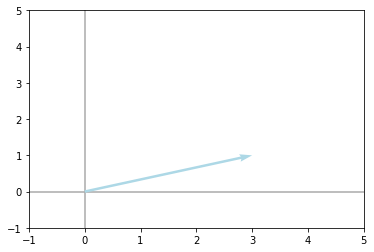

In [66]:
plotVectors([v], cols=['lightblue'])
_ = plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

"Applying" a matrix to a vector (i.e., performing matrix-vector multiplication) can linearly transform the vector, e.g, rotate it or rescale it.

The identity matrix, introduced earlier, is the exception that proves the rule: Applying an identity matrix does not transform the vector: 

In [67]:
I = np.array([[1, 0], [0, 1]])
I

array([[1, 0],
       [0, 1]])

In [68]:
Iv = np.dot(I, v)
Iv

array([3, 1])

In [69]:
v == Iv

array([ True,  True])

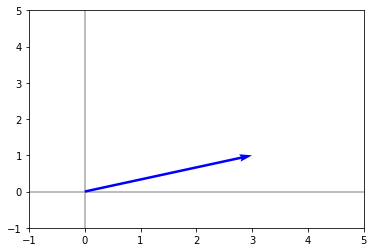

In [70]:
plotVectors([Iv], cols=['blue'])
_ = plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

In contrast, let's see what happens when we apply (some non-identity matrix) $A$ to the vector $v$: 

In [71]:
A = np.array([[-1, 4], [2, -2]])
A

array([[-1,  4],
       [ 2, -2]])

In [72]:
Av = np.dot(A, v)
Av

array([1, 4])

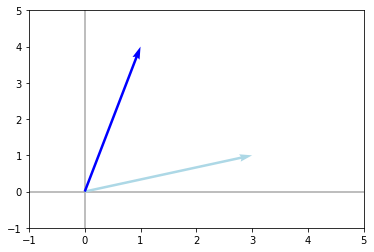

In [73]:
plotVectors([v, Av], ['lightblue', 'blue'])
_ = plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

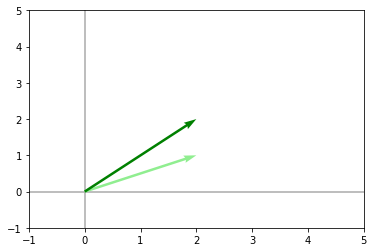

In [74]:
# a second example:
v2 = np.array([2, 1])
plotVectors([v2, np.dot(A, v2)], ['lightgreen', 'green'])
_ = plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

We can concatenate several vectors together into a matrix (say, $V$), where each column is a separate vector. Then, whatever linear transformations we apply to $V$ will be independently applied to each column (vector): 

In [75]:
v

array([3, 1])

In [76]:
# recall that we need to convert array to 2D to transpose into column, e.g.:
np.matrix(v).T 

matrix([[3],
        [1]])

In [77]:
v3 = np.array([-3, -1]) # mirror image of x over both axes
v4 = np.array([-1, 1])

In [78]:
V = np.concatenate((np.matrix(v).T, 
                    np.matrix(v2).T,
                    np.matrix(v3).T,
                    np.matrix(v4).T), 
                   axis=1)
V

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [79]:
IV = np.dot(I, V)
IV

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [80]:
AV = np.dot(A, V)
AV

matrix([[ 1,  2, -1,  5],
        [ 4,  2, -4, -4]])

In [81]:
# function to convert column of matrix to 1D vector: 
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

In [82]:
vectorfy(V, 0)

array([3, 1])

In [83]:
vectorfy(V, 0) == v

array([ True,  True])

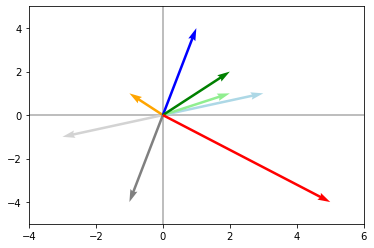

In [84]:
plotVectors([vectorfy(V, 0), vectorfy(V, 1), vectorfy(V, 2), vectorfy(V, 3),
             vectorfy(AV, 0), vectorfy(AV, 1), vectorfy(AV, 2), vectorfy(AV, 3)], 
            ['lightblue', 'lightgreen', 'lightgray', 'orange',
             'blue', 'green', 'gray', 'red'])
_ = plt.xlim(-4, 6)
_ = plt.ylim(-5, 5)

**Return to slides here for pencil-and-paper questions.**

Now that we can appreciate linear transformation of vectors by matrices, let's move on to working with eigenvectors and eigenvalues. 

An **eigenvector** (*eigen* is German for "typical"; we could translate *eigenvector* to "characteristic vector") is a special vector $v$ such that when it is transformed by some matrix (let's say $A$), the product $Av$ has the exact same direction as $v$.

An **eigenvalue** is a scalar (traditionally represented as $\lambda$) that simply scales the eigenvector $v$ such that the following equation is satisfied: 

$Av = \lambda v$

Easiest way to understand this is to work through an example: 

In [85]:
A

array([[-1,  4],
       [ 2, -2]])

Eigenvectors and eigenvalues [can be derived algebraically](https://lpsa.swarthmore.edu/MtrxVibe/EigMat/MatrixEigen.html), however this is outside scope of today's class. We'll cheat with NumPy `eig()` method, which returns a tuple of: 

* a vector of eigenvalues
* a matrix of eigenvectors

In [86]:
lambdas, V = np.linalg.eig(A) 

The matrix contains as many eigenvectors as there are columns of A: 

In [87]:
V # each column is a separate eigenvector v

array([[ 0.86011126, -0.76454754],
       [ 0.51010647,  0.64456735]])

With a corresponding eigenvalue for each eigenvector:

In [88]:
lambdas

array([ 1.37228132, -4.37228132])

Let's confirm that $Av = \lambda v$ for the first eigenvector: 

In [89]:
v = V[:,0] 
v

array([0.86011126, 0.51010647])

In [90]:
lambduh = lambdas[0] # note that "lambda" is reserved term in Python
lambduh

1.3722813232690143

In [91]:
Av = np.dot(A, v)
Av

array([1.18031462, 0.70000958])

In [92]:
lambduh * v

array([1.18031462, 0.70000958])

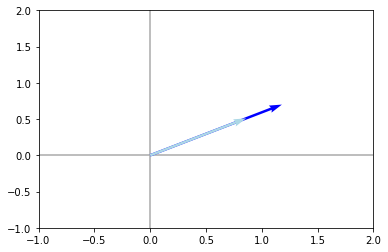

In [93]:
plotVectors([Av, v], ['blue', 'lightblue'])
_ = plt.xlim(-1, 2)
_ = plt.ylim(-1, 2)

And again for the second eigenvector of A: 

In [94]:
v2 = V[:,1]
v2

array([-0.76454754,  0.64456735])

In [95]:
lambda2 = lambdas[1]
lambda2

-4.372281323269014

In [96]:
Av2 = np.dot(A, v2)
Av2

array([ 3.34281692, -2.81822977])

In [97]:
lambda2 * v2

array([ 3.34281692, -2.81822977])

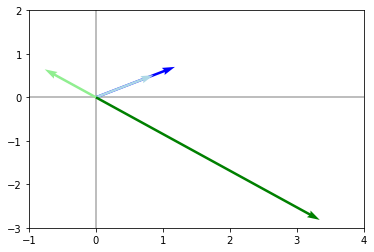

In [98]:
plotVectors([Av, v, Av2, v2], 
            ['blue', 'lightblue', 'green', 'lightgreen'])
_ = plt.xlim(-1, 4)
_ = plt.ylim(-3, 2)

Using the PyTorch `eig()` method, we can do exactly the same: 

In [99]:
A

array([[-1,  4],
       [ 2, -2]])

In [100]:
A_p = torch.tensor([[-1, 4], [2, -2.]]) # must be float for PyTorch eig()
A_p

tensor([[-1.,  4.],
        [ 2., -2.]])

In [101]:
eigens = torch.eig(A_p, eigenvectors=True) 
eigens

torch.return_types.eig(
eigenvalues=tensor([[ 1.3723,  0.0000],
        [-4.3723,  0.0000]]),
eigenvectors=tensor([[ 0.8601, -0.7645],
        [ 0.5101,  0.6446]]))

In [102]:
v_p = eigens.eigenvectors[:,0]
v_p

tensor([0.8601, 0.5101])

In [103]:
lambda_p = eigens.eigenvalues[0][0]
lambda_p

tensor(1.3723)

In [104]:
Av_p = torch.matmul(A_p, v_p)
Av_p

tensor([1.1803, 0.7000])

In [105]:
lambda_p * v_p

tensor([1.1803, 0.7000])

In [106]:
v2_p = eigens.eigenvectors[:,1]
v2_p

tensor([-0.7645,  0.6446])

In [107]:
lambda2_p = eigens.eigenvalues[1][0]
lambda2_p

tensor(-4.3723)

In [108]:
Av2_p = torch.matmul(A_p, v2_p)
Av2_p

tensor([ 3.3428, -2.8182])

In [109]:
lambda2_p * v2_p

tensor([ 3.3428, -2.8182])

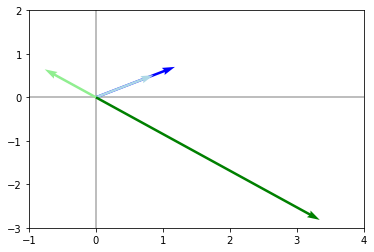

In [110]:
plotVectors([Av_p.numpy(), v_p.numpy(), Av2_p.numpy(), v2_p.numpy()], 
            ['blue', 'lightblue', 'green', 'lightgreen'])
_ = plt.xlim(-1, 4)
_ = plt.ylim(-3, 2)

### Eigenvectors in >2 Dimensions

While plotting gets trickier in higher-dimensional spaces, we can nevertheless find and use eigenvectors with more than two dimensions. Here's a 3D example (there are three dimensions handled over three rows): 

In [111]:
X

array([[ 1,  2,  4],
       [ 2, -1,  3],
       [ 0,  5,  1]])

In [112]:
lambdas_X, V_X = np.linalg.eig(X) 

In [113]:
V_X # one eigenvector per column of X

array([[-0.38021672,  0.80395279,  0.7014215 ],
       [-0.59949826,  0.23387109,  0.47053617],
       [ 0.704299  , -0.5467762 ,  0.53535371]])

In [114]:
lambdas_X # a corresponding eigenvalue for each eigenvector

array([-3.25599251, -1.13863631,  5.39462882])

Confirm $Xv = \lambda v$ for an example vector: 

In [115]:
v_X = V_X[:,0] 
v_X

array([-0.38021672, -0.59949826,  0.704299  ])

In [116]:
lambda_X = lambdas_X[0] 
lambda_X

-3.2559925086236277

In [117]:
np.dot(X, v_X) # matrix multiplication

array([ 1.23798278,  1.95196183, -2.29319228])

In [118]:
lambda_X * v_X

array([ 1.23798278,  1.95196183, -2.29319228])

**Exercises**:

1. Use PyTorch to confirm $Xv = \lambda v$ for the first eigenvector of $X$.
2. Confirm $Xv = \lambda v$ for the remaining eigenvectors of $X$ (you can use NumPy or PyTorch, whichever you prefer).

**Return to slides here.**

### Determinants Revisited

In [119]:
X = np.array([[4, 2], [-5, -3]])
X

array([[ 4,  2],
       [-5, -3]])

In [120]:
np.linalg.det(X)

-2.0000000000000013

In [121]:
lambdas, V = np.linalg.eig(X)
lambdas

array([ 2., -1.])

In [122]:
np.product(lambdas)

-2.0

In [123]:
np.abs(np.product(lambdas))

2.0

**Return to slides here.**

In [124]:
B = np.array([[1, 0], [0, 1]])
B

array([[1, 0],
       [0, 1]])

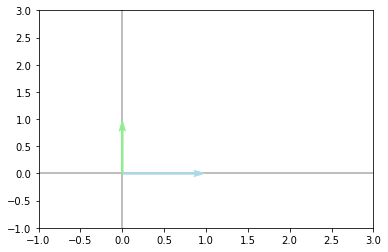

In [157]:
plotVectors([vectorfy(B, 0), vectorfy(B, 1)],
            ['lightblue', 'lightgreen'])
_ = plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

In [131]:
N

tensor([[-4.,  1.],
        [-8.,  2.]])

In [132]:
np.linalg.det(N)

0.0

In [134]:
NB = np.dot(N, B)
NB

array([[-4.,  1.],
       [-8.,  2.]])

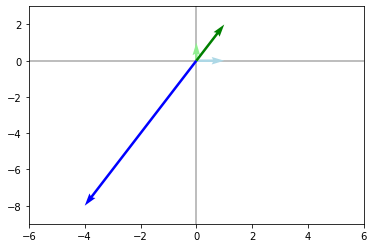

In [155]:
plotVectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(NB, 0), vectorfy(NB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
_ = plt.xlim(-6, 6)
_ = plt.ylim(-9, 3)

In [141]:
I

array([[1, 0],
       [0, 1]])

In [142]:
np.linalg.det(I)

1.0

In [143]:
IB = np.dot(I, B)
IB

array([[1, 0],
       [0, 1]])

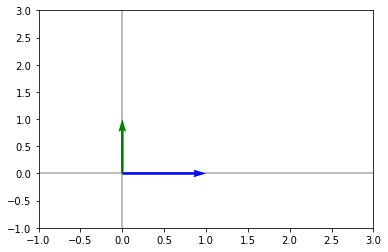

In [158]:
plotVectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(IB, 0), vectorfy(IB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
_ = plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

In [147]:
J = np.array([[-0.5, 0], [0, 2]])
J

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

In [148]:
np.linalg.det(J)

-1.0

In [149]:
np.abs(np.linalg.det(J))

1.0

In [151]:
JB = np.dot(J, B)
JB

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

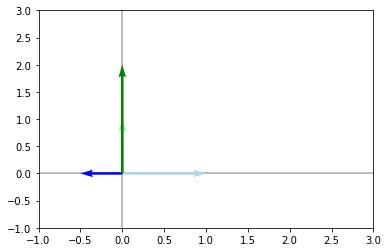

In [159]:
plotVectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(JB, 0), vectorfy(JB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
_ = plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

In [160]:
doubleI = I*2

In [161]:
np.linalg.det(doubleI)

4.0

In [162]:
doubleIB = np.dot(doubleI, B)
doubleIB

array([[2, 0],
       [0, 2]])

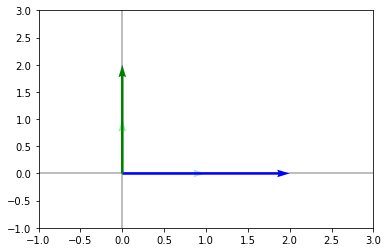

In [163]:
plotVectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(doubleIB, 0), vectorfy(doubleIB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
_ = plt.xlim(-1, 3)
_ = plt.ylim(-1, 3)

In [164]:
# returning to the matrix X with its absolute det(X) of 2: 
np.abs(np.linalg.det(X))

2.0000000000000013

In [165]:
XB = np.dot(X, B)
XB

array([[ 4,  2],
       [-5, -3]])

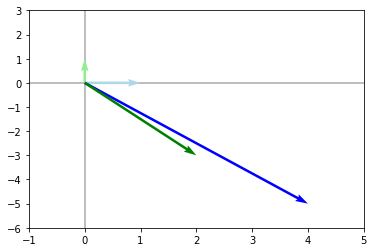

In [168]:
plotVectors([vectorfy(B, 0), vectorfy(B, 1), vectorfy(XB, 0), vectorfy(XB, 1)],
            ['lightblue', 'lightgreen', 'blue', 'green'])
_ = plt.xlim(-1, 5)
_ = plt.ylim(-6, 3)